# animelytics! >///<
    CIS 545 | Carol Li | 10501401

### project structure, information
#### structure
1. **exploratory data analysis:** statistics, average, genre, ratings.
2. **feature selection and engineering**
    * drop unecessary columns with unecessary features
3. **modelling**
    * baseline model: linear regression.
    * comparison model: NN (?) decide when get here lol

#### links
https://www.kaggle.com/azathoth42/myanimelist

**using:**
* `anime_cleaned.csv`
* `animelist_cleaned.csv`

submission requires presentation, blog post, or session with craig.

## 0. Loading Packages and Data

In [6]:
# installing required packages
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

# baseline regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from matplotlib import rcParams

# graph display
import joblib
import pydot
from IPython.display import Image

In [12]:
# loading animelist data
animelist_data = './data/animelists_cleaned.csv'
animelist_df = pd.read_csv(animelist_data)
animelist_df

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31284025,Yokonightcore,15611,48,2014-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:33:03,NaN
31284026,Yokonightcore,27815,22,0000-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:32:05,NaN
31284027,wargod,5945,39,0000-00-00,0000-00-00,8,2,0.0,0,2010-03-29 04:24:12,NaN
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,NaN,0,2009-12-23 05:45:14,NaN


In [8]:
# loading anime rating data
anime_data = './data/anime_cleaned.csv'
anime_df = pd.read_csv(anime_data)

**notes on columns:**
* rating refers to maturity rating
* scored by refers to number of ratings for data

In [10]:
anime_df.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year'],
      dtype='object')

## **1.** EDA

**requirements:** (according to craig)
* overall, statistics about the data
    * 1 simple chart (like histogram) and 1 complex chart (box plot or violin plot)
    * for instance, hypothesize that ML model will predict that shounen gets higher ratings and write analysis that the ML model will properly verify this
    * do ratings on average rating per genre, etc.
* could first decide what to predict or do modelling off of, then base EDA on finding information about what they're trying to predict.
    * this way, could say EDA led to making certain hypothesis and that the modelling verifies the hypothesis.

### **1.1** Ratings and Popularity
We want to establish that anime with highest ratings tend to be the most popular.

TODO: Note that the **rank** of an anime refers to, whereas the **popularity** of an anime refers to.

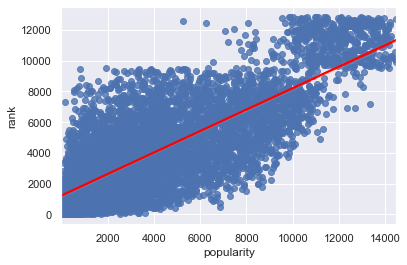

In [17]:
# ratings versus popularity regression plot
sb.set(color_codes=True)
ax = sb.regplot(x="popularity", y="rank", data=anime_df,line_kws={'color':'red'})

In [19]:
# correlation matrix
anime_df.corr(method='pearson')

,anime_id,episodes,airing,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
anime_id,1.000000,-0.109610,0.223734,-0.223733,-0.046057,0.274671,0.205813,-0.032301,-0.054066,-0.205838,0.623290
episodes,-0.109610,1.000000,-0.037289,0.076875,0.068544,-0.049064,-0.009545,0.079572,0.106804,-0.105711,-0.147920
airing,0.223734,-0.037289,1.000000,-0.066910,-0.046482,0.100467,0.079229,-0.030711,-0.004717,-0.086957,0.142681
score,-0.223733,0.076875,-0.066910,1.000000,0.381926,-0.898747,-0.688492,0.415626,0.256094,0.298989,0.042159
scored_by,-0.046057,0.068544,-0.046482,0.381926,1.000000,-0.356686,-0.425719,0.987107,0.793949,0.046203,0.110892
rank,0.274671,-0.049064,0.100467,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503,-0.294528,-0.063543
popularity,0.205813,-0.009545,0.079229,-0.688492,-0.425719,0.777302,1.000000,-0.474798,-0.210745,-0.159596,-0.236951
members,-0.032301,0.079572,-0.030711,0.415626,0.987107,-0.391524,-0.474798,1.000000,0.781565,0.039457,0.135725
favorites,-0.054066,0.106804,-0.004717,0.256094,0.793949,-0.208503,-0.210745,0.781565,1.000000,0.002669,0.031254
duration_min,-0.205838,-0.105711,-0.086957,0.298989,0.046203,-0.294528,-0.159596,0.039457,0.002669,1.000000,-0.183812


As we can see in the correlation matrix above, the correlation between rank and popularity is 0.777302, indicating that there is a significant association between the rank of an anime and its popularity. 

## 2. Feature Selection/Extraction

**notes:**
* sort by popularity